## -SPAM EMAIL DETECTION-
## Import Necessory library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

# Reading The Dataset:

In [2]:
data=pd.read_csv("dataset3.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# Data Cleaning
# Remove rows with missing values
data.dropna(subset=['Category', 'Message'], inplace=True)

In [4]:
# Ensure that no messages are empty after removing stop words
data = data[data['Message'].str.strip().astype(bool)]

In [5]:
# Preprocess the data
# Encode 'Category' column: spam -> 1, ham -> 0
data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})

In [6]:
# Remove documents that only contain stop words
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data['Message'])

In [9]:
# Check for NaNs,infinite or very large values in the TF-IDF matrix
if np.isnan(X.data).any() or not np.isfinite(X.data).all():
    raise ValueError("The TF-IDF matrix contains NaN or infinite values. Please check your data.")

# Convert the sparse matrix to a dense format for further validation
X_dense = X.toarray()
X_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
# Check for extremely large values
if np.any(np.abs(X_dense) > 1e6):
    raise ValueError("The TF-IDF matrix contains very large values.check The data.")


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [19]:
# Proceed with y as the target variable
y = data['Category']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)


In [14]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
y_train

1978    1
3989    0
3935    0
4078    0
4086    1
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: Category, Length: 4457, dtype: int64

In [12]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

Model: Logistic Regression
Accuracy: 0.95695067264574
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       1.00      0.68      0.81       149

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

Confusion Matrix:
[[966   0]
 [ 48 101]]



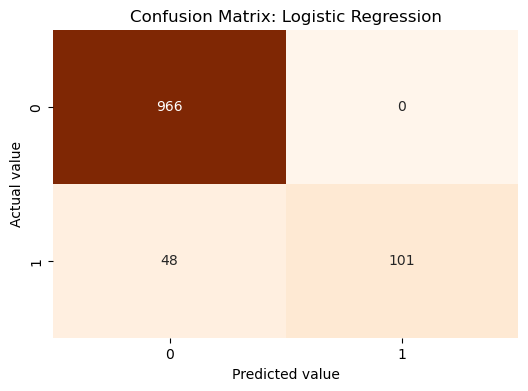

Model: Random Forest
Accuracy: 0.9820627802690582
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[966   0]
 [ 20 129]]



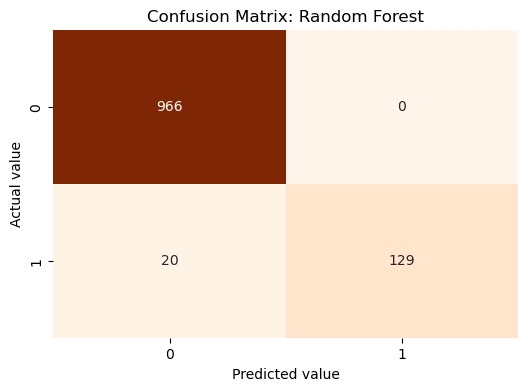

Model: AdaBoost
Accuracy: 0.9730941704035875
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.96      0.83      0.89       149

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[961   5]
 [ 25 124]]



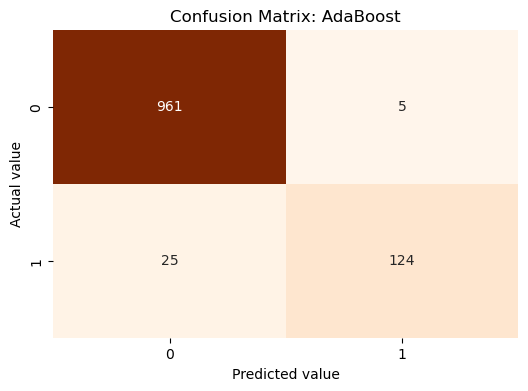

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: K-Nearest Neighbors
Accuracy: 0.9103139013452914
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       966
           1       1.00      0.33      0.49       149

    accuracy                           0.91      1115
   macro avg       0.95      0.66      0.72      1115
weighted avg       0.92      0.91      0.89      1115

Confusion Matrix:
[[966   0]
 [100  49]]



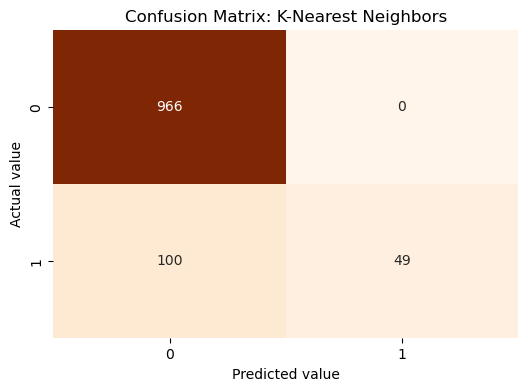

In [13]:
# Train and evaluate each model
for model_name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{report}")
        print(f"Confusion Matrix:\n{conf_matrix}\n")

        # Plot the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
        plt.xlabel("Predicted value")
        plt.ylabel("Actual value")
        plt.title(f"Confusion Matrix: {model_name}")
        plt.show()

    except Exception as e:
        print(f"Error with model {model_name}: {e}")